In [795]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm
from tqdm import trange
from torch.func import jacfwd, jacrev, vmap
import time
from torch import tensor, sum, log, max, cos, sin, pi, clone, sqrt, mean, std, sort
from scipy.constants import g
from torch import nn

import os
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader
from torchvision import datasets, transforms

from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

import time

import pandas as pd
from torchvision.io import decode_image

from dpfuncs import *

device = 'cpu' #10x slower running on MPS :(
torch.set_default_device(device)

time elapsed = 0.30, device = cpu


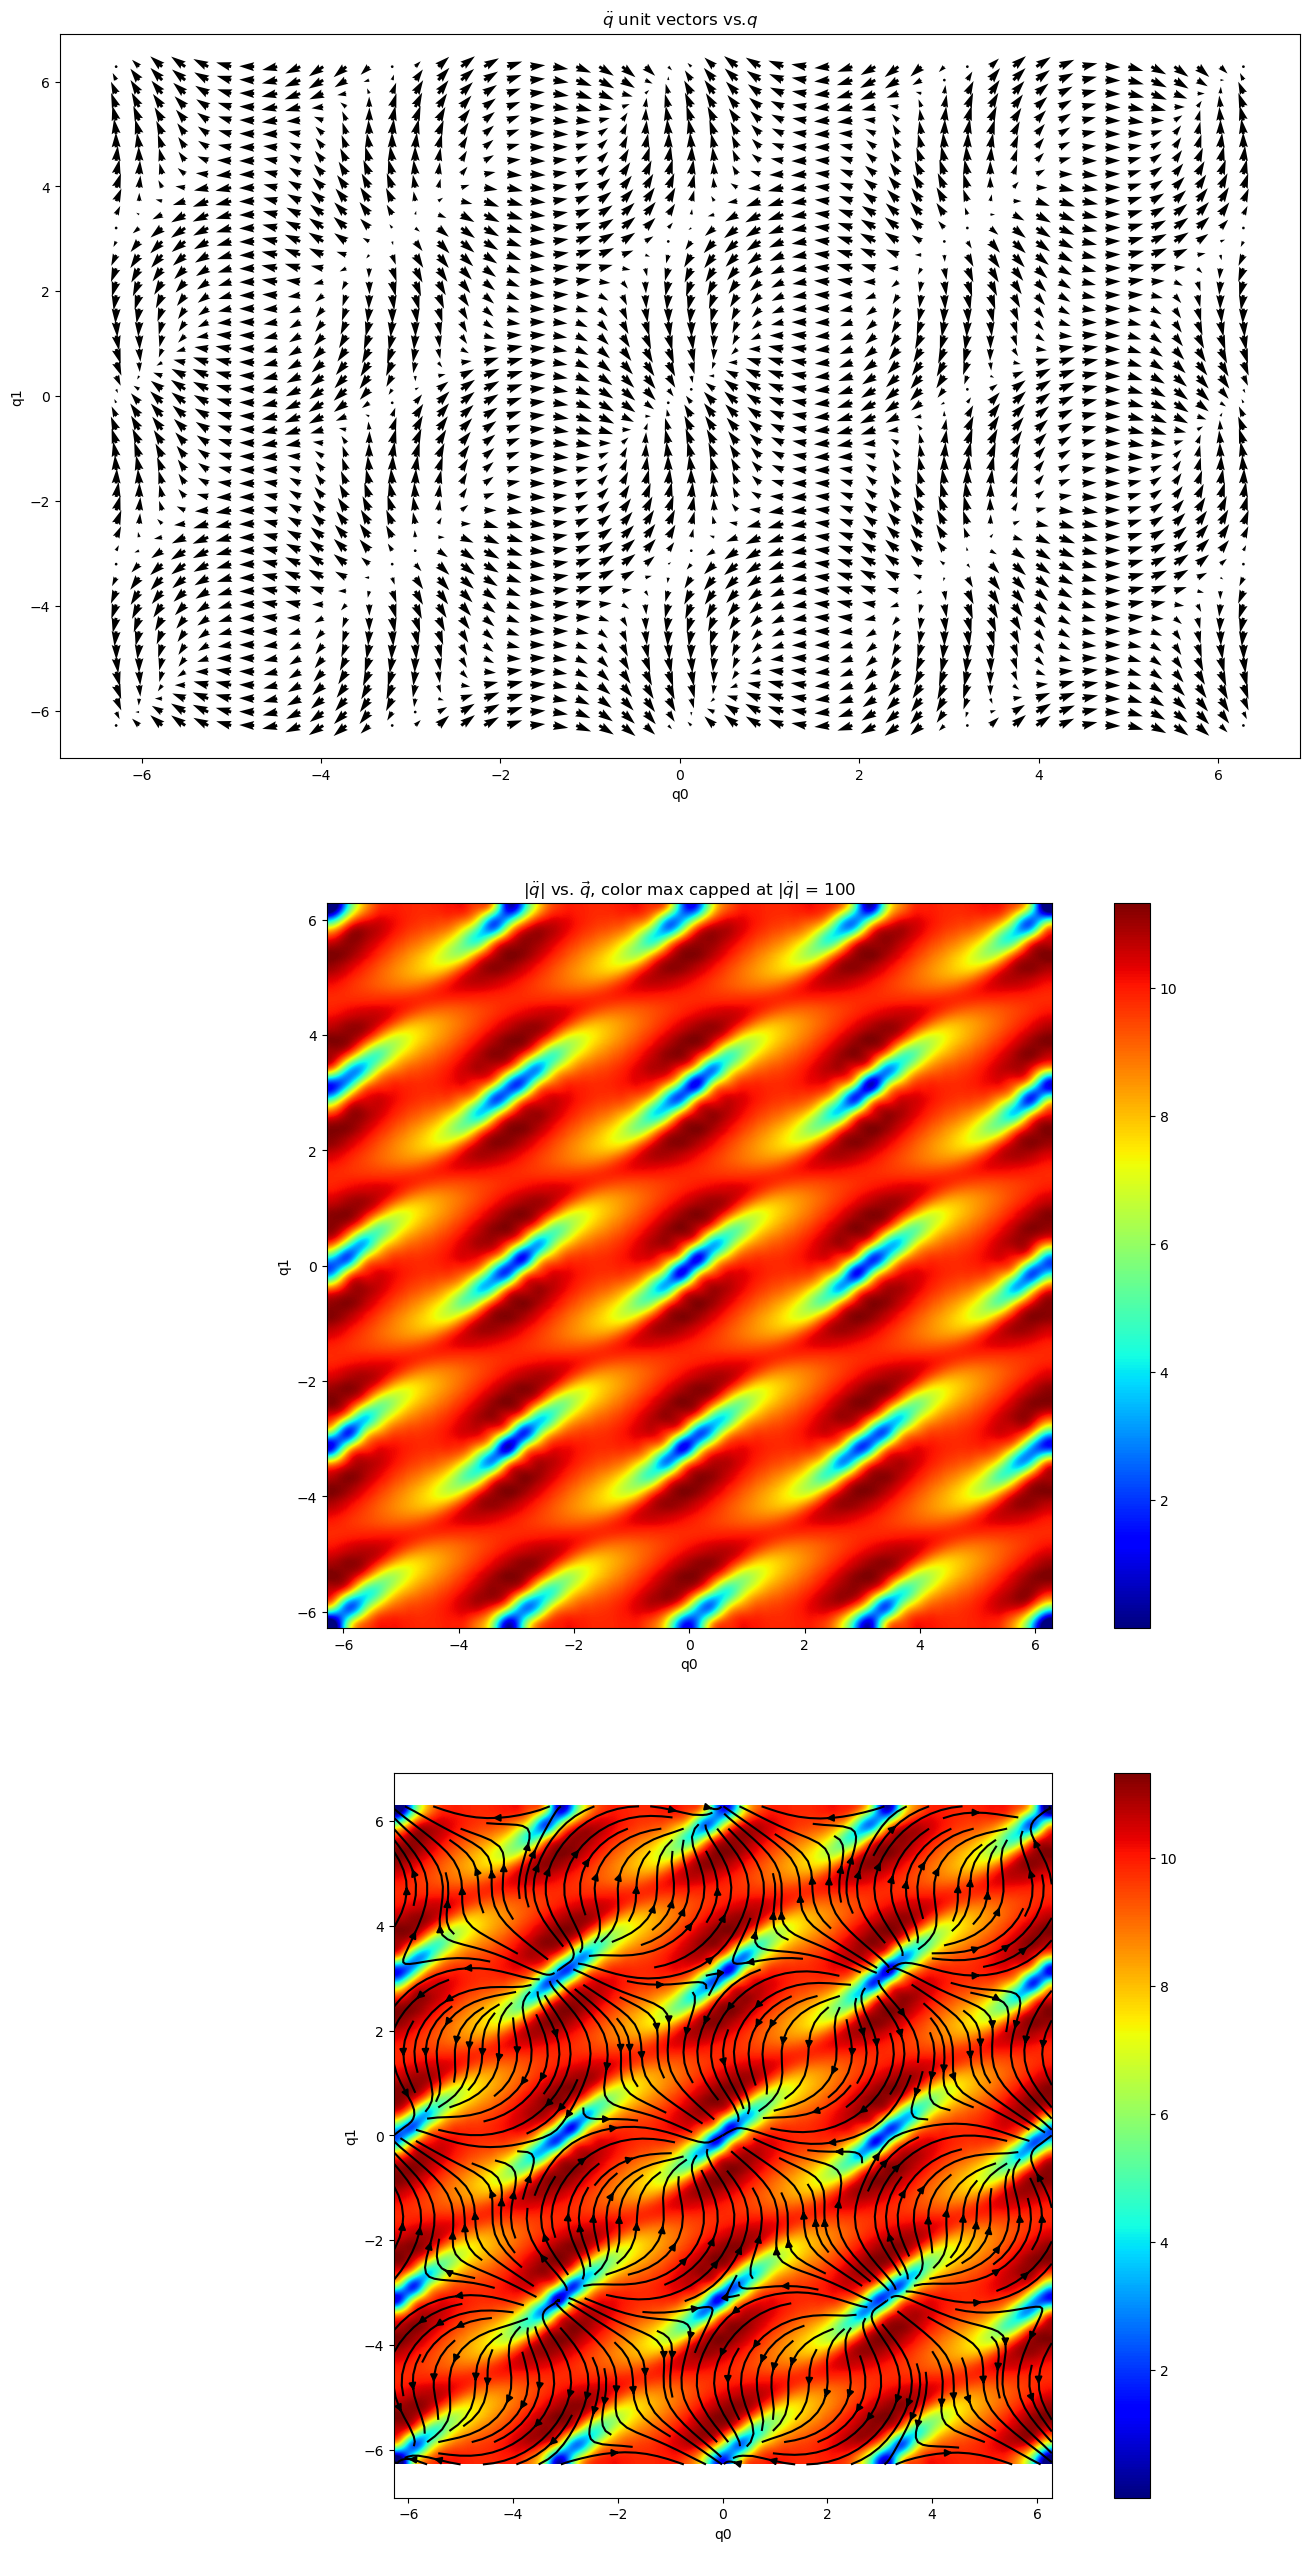

In [939]:



t1 = time.time()
#####
# problem setup

m1 = torch.tensor([1],dtype=torch.float)
l1 = torch.tensor([1],dtype=torch.float)
m2 = torch.tensor([1],dtype=torch.float)
l2 = torch.tensor([1],dtype=torch.float)

n_points = 50**2

grid_sampling = 1

t0_min = -2*pi
t0_max = 2*pi
t1_min = -2*pi
t1_max = 2*pi

tdot_min = -0
tdot_max = 0


if grid_sampling == 1:
    Qv, QDv = grid_sampling_q_no_qdot(t0_min,t0_max,t1_min,t1_max,n_points)
else:
    Qv, QDv = rand_sampling_q_no_qdot(t0_min,t0_max,t1_min,t1_max,n_points)
n_points = Qv.shape[1]






out = QDDv(Qv,QDv,m1,m2,l1,l2).mT.cpu().detach()
out_true = QDD_true_v(Qv,QDv,m1,m2,l1,l2).cpu().detach()


Qv = Qv.cpu().detach()
QDv = QDv.cpu().detach()


outmag = torch.ones(n_points).cpu().detach()#(out[:,0]**2 + out[:,1]**2)**.5
#print(out)

t_elapsed = time.time() - t1
print(f"time elapsed = {t_elapsed:.2f}, device = {device}")


#####
# plotting

quiver_points = 75**2 #define how many arrows to quiver plot
if quiver_points > n_points: #if specified value greater than number of points analyzed
    quiver_points = n_points #set quiver_points to n_points

n_side = min(tensor([int(sqrt(tensor(n_points))), int(sqrt(tensor(quiver_points)))]) )

t0v = Qv[0,:quiver_points].reshape(n_side,n_side).mT.numpy()
t1v = Qv[1,:quiver_points].reshape(n_side,n_side).mT.numpy()

u = out[0,:quiver_points].reshape(n_side,n_side).numpy()
v = out[1,:quiver_points].reshape(n_side,n_side).numpy()

if grid_sampling == 1:
    fig,axs = plt.subplots(3,1,figsize=(16,32))
    
    #scatter = axs[0].scatter(Qv[0,:],Qv[1,:],c=sqrt(sum(out**2,axis=0)),cmap='jet')
    #plt.colorbar(scatter,ax=axs[0])
    axs[0].quiver(Qv[0,:quiver_points],Qv[1,:quiver_points],out[0,:quiver_points]/outmag[:quiver_points],out[1,:quiver_points]/outmag[:quiver_points])
    axs[0].set_xlabel('q0')
    axs[0].set_ylabel('q1')
    axs[0].set_title(r'$\ddot{q}$ unit vectors vs.$q$')

    interp_method = 'lanczos'
    cmax = 100
    colors = axs[1].imshow(np.sqrt(out[0,:]**2 + out[1,:]**2).reshape(int(sqrt(tensor(n_points))),int(sqrt(tensor(n_points)))),extent=[t0v.min(),t0v.max(),t1v.min(),t1v.max()],origin='lower',cmap='jet',interpolation=interp_method)
    plt.colorbar(colors,ax=axs[1])
    axs[1].set_xlabel('q0')
    axs[1].set_ylabel('q1')
    axs[1].set_title(r'$|\ddot{q}|$ vs. $\vec{q}$, color max capped at $|\ddot{q}|$ = ' + f'{cmax}')
    
    
    
    colors = axs[2].imshow(np.sqrt(out[0,:]**2 + out[1,:]**2).reshape(int(sqrt(tensor(n_points))),int(sqrt(tensor(n_points)))),extent=[t0v.min(),t0v.max(),t1v.min(),t1v.max()],cmap='jet',interpolation=interp_method,origin='lower')
    plt.colorbar(colors,ax=axs[2])
    axs[2].streamplot(t0v,t1v,v,u,color='black',density=2)
    axs[2].set_xlabel('q0')
    axs[2].set_ylabel('q1')
    
    plt.show()

else:
    fig,axs = plt.subplots(2,1,figsize=(8,16))
    
    #scatter = axs[0].scatter(Qv[0,:],Qv[1,:],c=sqrt(sum(out**2,axis=0)),cmap='jet')
    #plt.colorbar(scatter,ax=axs[0])
    axs[0].quiver(Qv[0,:quiver_points],Qv[1,:quiver_points],out[0,:quiver_points]/outmag[:quiver_points],out[1,:quiver_points]/outmag[:quiver_points])
    axs[0].set_xlabel('q0')
    axs[0].set_ylabel('q1')
    axs[0].set_title(r'$\ddot{q}$ unit vectors vs.$q$')
    
    cmax = 100
    scatter = axs[1].scatter(Qv[0,:],Qv[1,:],c=sqrt(sum(out**2,axis=0)),cmap='jet')
    plt.colorbar(scatter,ax=axs[1])
    axs[1].set_xlabel('q0')
    axs[1].set_ylabel('q1')
    axs[1].set_title(r'$|\ddot{q}|$ vs. $\vec{q}$, color max capped at $|\ddot{q}|$ = ' + f'{cmax}')



***Visualize a slice through $\dot{q}$ space***

time elapsed = 0.29, device = cpu


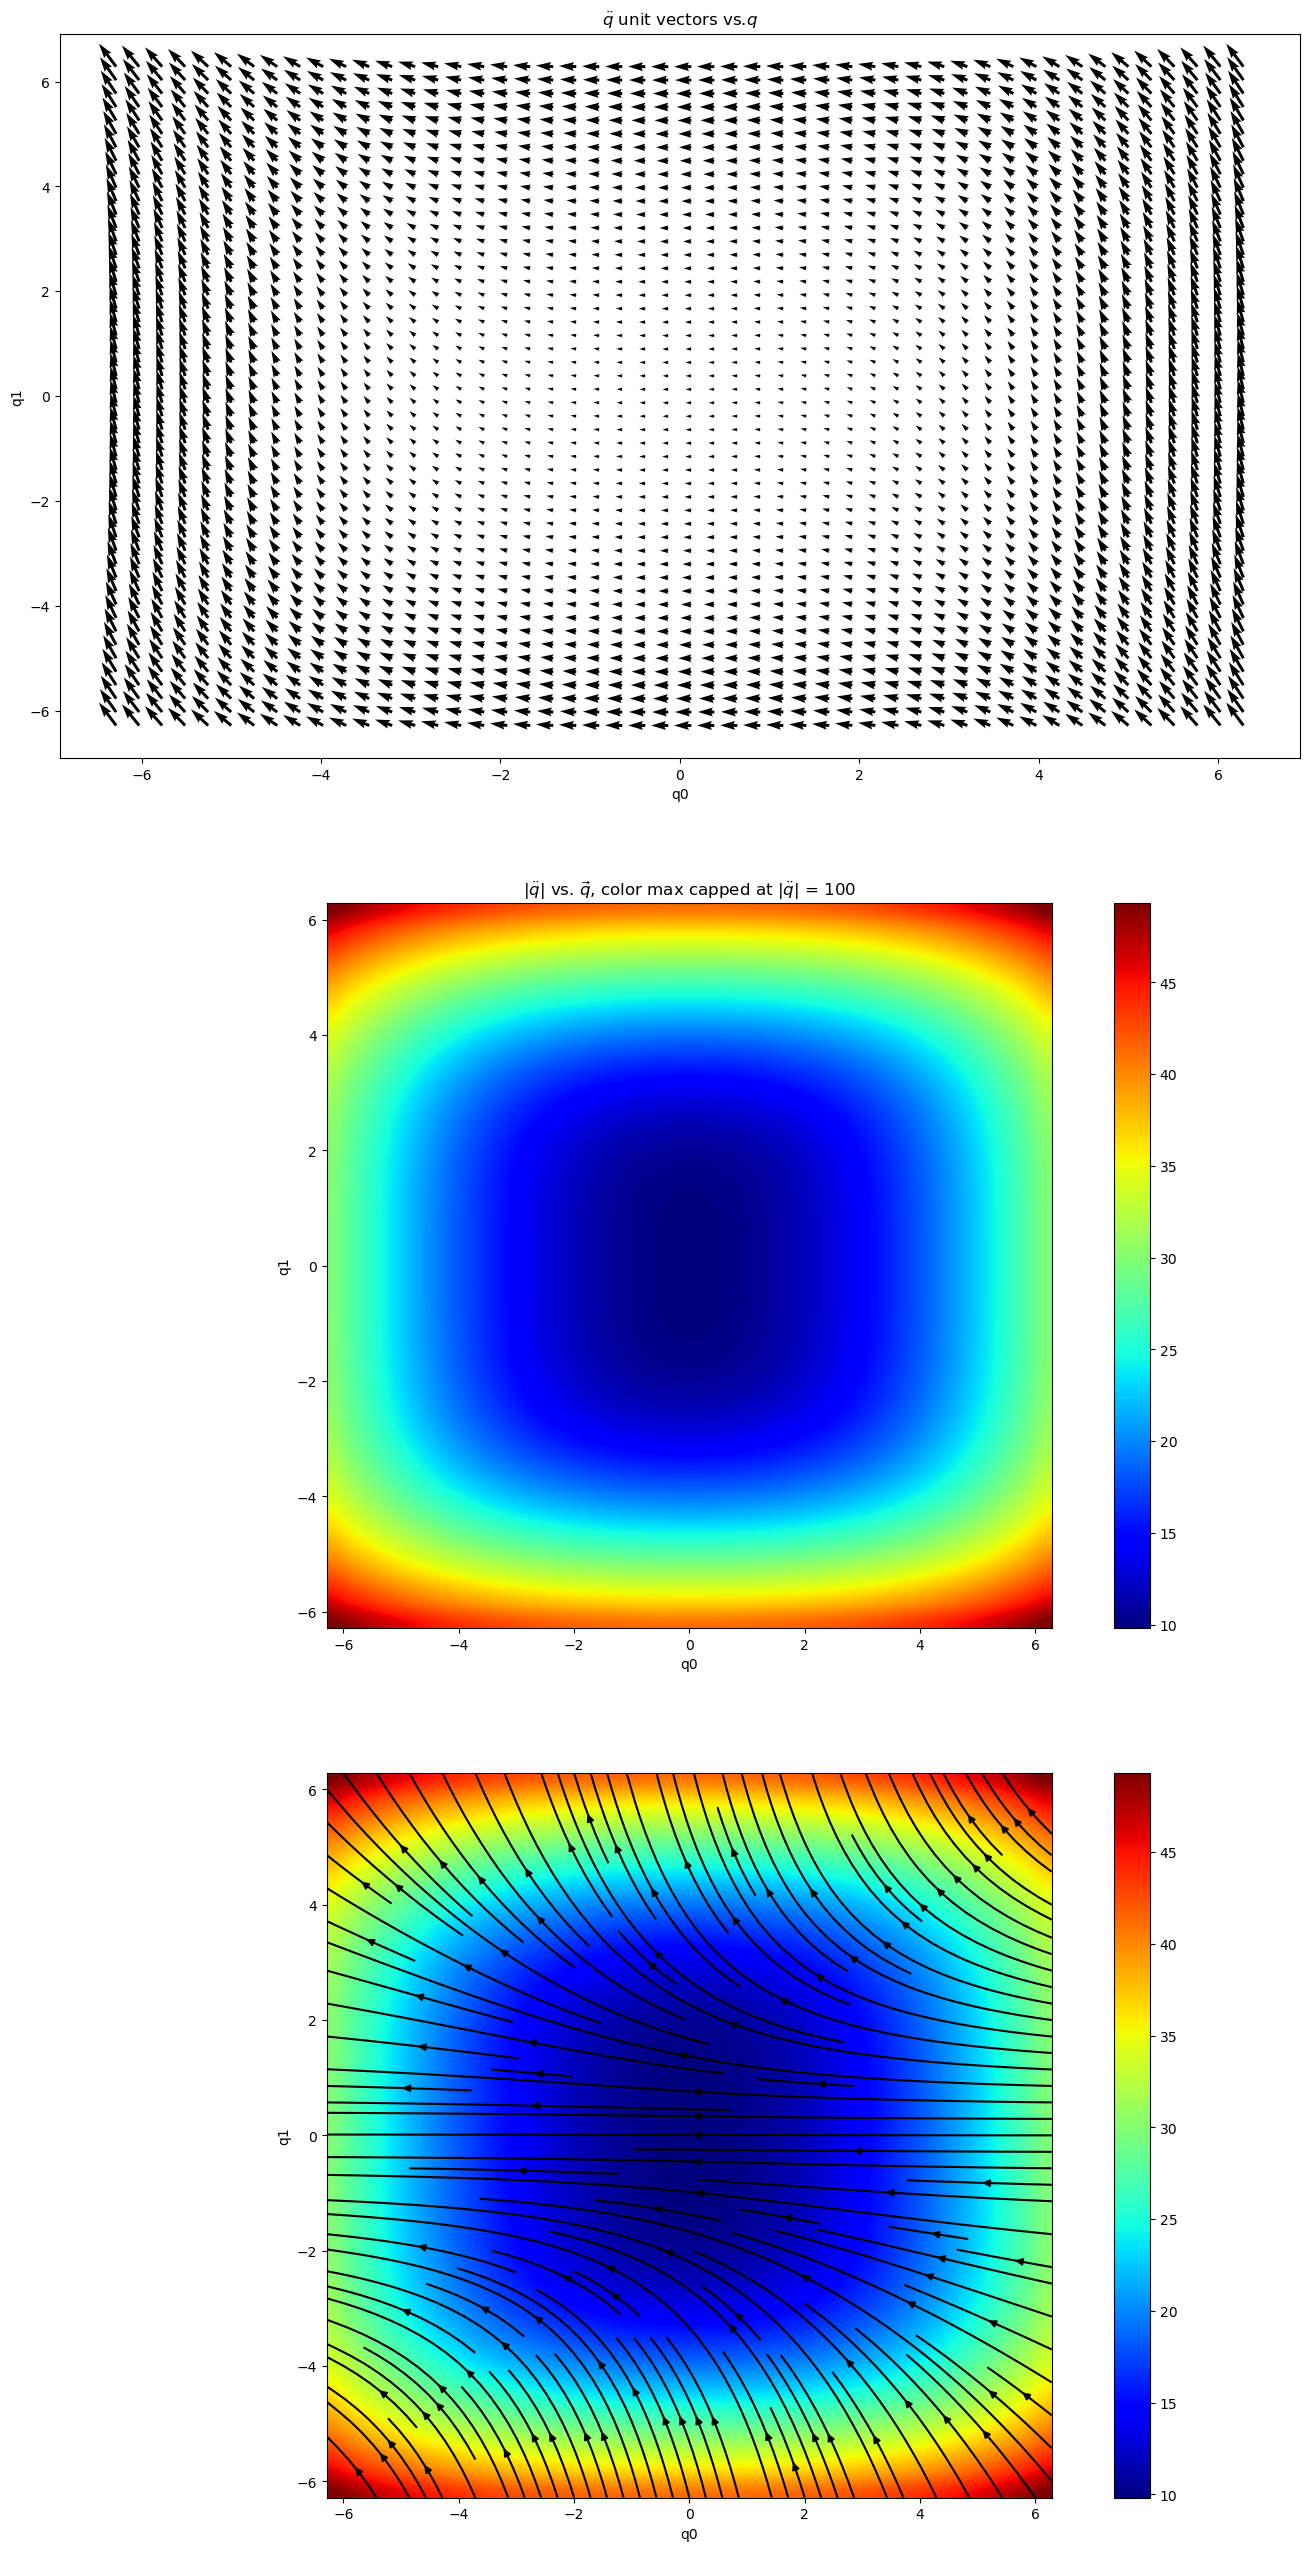

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm
from torch.func import jacfwd, jacrev, vmap
import time
from torch import tensor, sum, log, max, cos, sin, pi, clone, sqrt, mean, std, sort
from scipy.constants import g
from torch import nn

import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

import time

import pandas as pd
from torchvision.io import decode_image

from dpfuncs import *

dev = 'cpu' #10x slower running on MPS :(
torch.set_default_device(dev)

t1 = time.time()
#####
# problem setup

m1 = torch.tensor([1],dtype=torch.float)
l1 = torch.tensor([1],dtype=torch.float)
m2 = torch.tensor([1],dtype=torch.float)
l2 = torch.tensor([1],dtype=torch.float)

n_points = 50**2

grid_sampling = 1

t_value = tensor([torch.pi/2,0])

tdot0_min = -2*pi
tdot0_max = 2*pi
tdot1_min = -2*pi
tdot1_max = 2*pi


if grid_sampling == 1:
    Qv, QDv = grid_sampling_qdot_with_q(tdot0_min,tdot0_max,tdot1_min,tdot1_max,n_points,t_value)
else:
    Qv, QDv = rand_sampling_qdot_no_q(t0_min,t0_max,t1_min,t1_max,n_points) #need to implement
n_points = Qv.shape[1]





out = QDDv(Qv,QDv,m1,m2,l1,l2).mT.cpu().detach()
out_true = QDD_true_v(Qv,QDv,m1,m2,l1,l2).cpu().detach()

Qv = Qv.cpu().detach()
QDv = QDv.cpu().detach()

outmag = torch.ones(n_points).cpu().detach()#(out[:,0]**2 + out[:,1]**2)**.5

t_elapsed = time.time() - t1
print(f"time elapsed = {t_elapsed:.2f}, device = {dev}")


##########
# plotting

quiver_points = 75**2 #define how many arrows to quiver plot
if quiver_points > n_points: #if specified value greater than number of points analyzed
    quiver_points = n_points #set quiver_points to n_points

n_side = min(tensor([int(sqrt(tensor(n_points))), int(sqrt(tensor(quiver_points)))]) )

td0v = QDv[0,:quiver_points].reshape(n_side,n_side).mT.numpy()
td1v = QDv[1,:quiver_points].reshape(n_side,n_side).mT.numpy()

u = out[0,:quiver_points].reshape(n_side,n_side).numpy()
v = out[1,:quiver_points].reshape(n_side,n_side).numpy()

if grid_sampling == 1:
    fig,axs = plt.subplots(3,1,figsize=(16,32))
    
    #scatter = axs[0].scatter(Qv[0,:],Qv[1,:],c=sqrt(sum(out**2,axis=0)),cmap='jet')
    #plt.colorbar(scatter,ax=axs[0])
    axs[0].quiver(QDv[0,:quiver_points],QDv[1,:quiver_points],out[0,:quiver_points]/outmag[:quiver_points],out[1,:quiver_points]/outmag[:quiver_points])
    axs[0].set_xlabel('q0')
    axs[0].set_ylabel('q1')
    axs[0].set_title(r'$\ddot{q}$ unit vectors vs.$q$')
    
    interp_method = 'lanczos'
    cmax = 100
    colors = axs[1].imshow(np.sqrt(out[0,:]**2 + out[1,:]**2).reshape(int(sqrt(tensor(n_points))),int(sqrt(tensor(n_points)))),extent=[t0v.min(),t0v.max(),t1v.min(),t1v.max()],origin='lower',cmap='jet',interpolation=interp_method)
    plt.colorbar(colors,ax=axs[1])
    axs[1].set_xlabel('q0')
    axs[1].set_ylabel('q1')
    axs[1].set_title(r'$|\ddot{q}|$ vs. $\vec{q}$, color max capped at $|\ddot{q}|$ = ' + f'{cmax}')
    
    
    
    colors = axs[2].imshow(np.sqrt(out[0,:]**2 + out[1,:]**2).reshape(int(sqrt(tensor(n_points))),int(sqrt(tensor(n_points)))),extent=[t0v.min(),t0v.max(),t1v.min(),t1v.max()],cmap='jet',interpolation=interp_method,origin='lower')
    plt.colorbar(colors,ax=axs[2])
    axs[2].streamplot(t0v,t1v,u,v,color='black',density=1.5)
    axs[2].set_xlabel('q0')
    axs[2].set_ylabel('q1')
    
    plt.show()

else:
    fig,axs = plt.subplots(2,1,figsize=(8,16))
    
    #scatter = axs[0].scatter(Qv[0,:],Qv[1,:],c=sqrt(sum(out**2,axis=0)),cmap='jet')
    #plt.colorbar(scatter,ax=axs[0])
    axs[0].quiver(Qv[0,:quiver_points],Qv[1,:quiver_points],out[0,:quiver_points]/outmag[:quiver_points],out[1,:quiver_points]/outmag[:quiver_points])
    axs[0].set_xlabel('q0')
    axs[0].set_ylabel('q1')
    axs[0].set_title(r'$\ddot{q}$ unit vectors vs.$q$')
    
    cmax = 100
    scatter = axs[1].scatter(Qv[0,:],Qv[1,:],c=sqrt(sum(out**2,axis=0)),cmap='jet')
    plt.colorbar(scatter,ax=axs[1])
    axs[1].set_xlabel('q0')
    axs[1].set_ylabel('q1')
    axs[1].set_title(r'$|\ddot{q}|$ vs. $\vec{q}$, color max capped at $|\ddot{q}|$ = ' + f'{cmax}')



***Prepare synthetic dataset***

In [1053]:
n_points = 64*50
batch_size = 64

m1 = torch.tensor([1],dtype=torch.float)
l1 = torch.tensor([1],dtype=torch.float)
m2 = torch.tensor([1],dtype=torch.float)
l2 = torch.tensor([1],dtype=torch.float)

grid_sampling = 0
full_sampling = 1
q_sampling = 0
qdot_sampling = 0


t_value = tensor([torch.pi/2,0])

t_scale = 2
t0_min = -t_scale*pi
t0_max = t_scale*pi
t1_min = -t_scale*pi
t1_max = t_scale*pi

tdot_scale = .001
tdot0_min = -tdot_scale*pi
tdot0_max = tdot_scale*pi
tdot1_min = -tdot_scale*pi
tdot1_max = tdot_scale*pi

if grid_sampling == 1:
    if q_sampling == 1:
        Qv, QDv = grid_sampling_q_no_qdot(t0_min,t0_max,t1_min,t1_max,n_points)
    elif qdot_sampling == 1:     
        Qv, QDv = grid_sampling_qdot_with_q(tdot0_min,tdot0_max,tdot1_min,tdot1_max,n_points,t_value)
else:
    if q_sampling == 1:
        Qv, QDv = rand_sampling_q_no_qdot(t0_min,t0_max,t1_min,t1_max,n_points,tdot0_min,tdot0_max)
    elif qdot_sampling == 1:
        Qv, QDv = rand_sampling_qdot_no_q(tdot0_min,tdot0_max,tdot1_min,tdot1_max,n_points,t0_min,t1_max)
    elif full_sampling == 1:
        Qv, QDv = rand_sampling_full(t0_min,t0_max,t1_min,t1_max,tdot0_min,tdot0_max,tdot1_min,tdot1_max,n_points)

n_points = Qv.shape[1]

out_true = QDD_true_v(Qv,QDv,m1,m2,l1,l2).cpu().detach()

Qv = Qv.cpu().detach()
QDv = QDv.cpu().detach()

Q_full = torch.cat((Qv,QDv))
dataset = TensorDataset(Q_full.mT,out_true.mT)


if device == 'mps':
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=0,pin_memory=False, drop_last=True)
else:
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=0,pin_memory=True, drop_last=True)

print('Sampling complete.')

Sampling complete.


In [1031]:
l1 = 512
l2 = 512
l3 = 512
l4 = 512

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        #self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(4, l1),
            nn.ReLU(),
            nn.Linear(l1, l2),
            nn.ReLU(),
            nn.Linear(l2, l3),
            nn.ReLU(),
            nn.Linear(l3, l4),
            nn.ReLU(),
            nn.Linear(l4, 2),
        )

    def forward(self, x):
        q = x[:2]
        qd = x[2:]
        q = torch.fmod(q,2*torch.pi)
        x = torch.cat((q,qd))
        qdd = self.linear_relu_stack(x)
        return qdd

model = NeuralNetwork().to(device)

def train_loop(dataloader, model, loss_fn, optimizer, print_option = False):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    loss_sum = 0
    for batch, (X, y) in enumerate(dataloader):
        #X = X.to(device)
        #y = y.to(device)
        # Compute prediction and loss
        pred = model(X.to(device))
        loss = loss_fn(pred, y.to(device))
        loss_sum += loss
        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        if batch % 100 == 0 and print_option != False:
            loss, current = loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
    return loss_sum


100%|██████████| 6000/6000 [07:33<00:00, 13.23it/s]


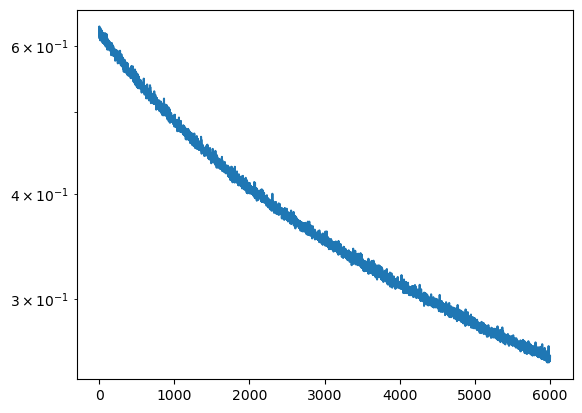

In [1071]:
learning_rate = 2e-4
num_epochs = 6000

loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
#optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for x, y in dataloader:
    x  = x.to(device)
    y = y.to(device)

loss_history = np.inf*np.ones(num_epochs)
saved_epochs = []
for i in trange(num_epochs):
    #print(f"EPOCH {i} -----------------------")
    loss_history[i] = train_loop(dataloader, model, loss_fn, optimizer)
    if loss_history[i] == min(loss_history):
        torch.save(model.state_dict(), 'working_best_params')
        saved_epochs.append(i)

#print(saved_epochs)
model.load_state_dict(torch.load('working_best_params', weights_only=True))
plt.plot(loss_history)
plt.yscale('log')

label: linear_relu_stack.0.weight


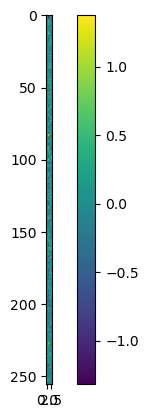

label: linear_relu_stack.2.weight


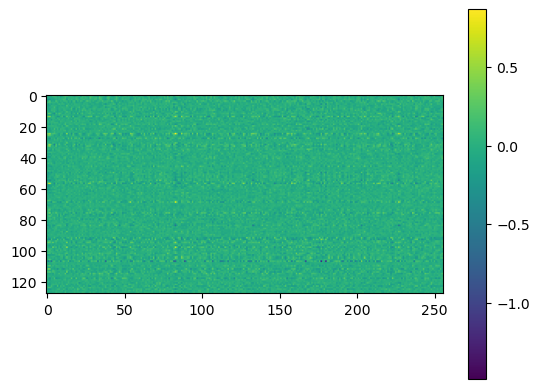

label: linear_relu_stack.4.weight


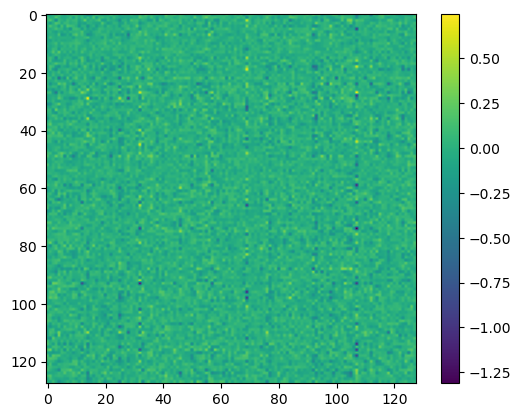

label: linear_relu_stack.6.weight


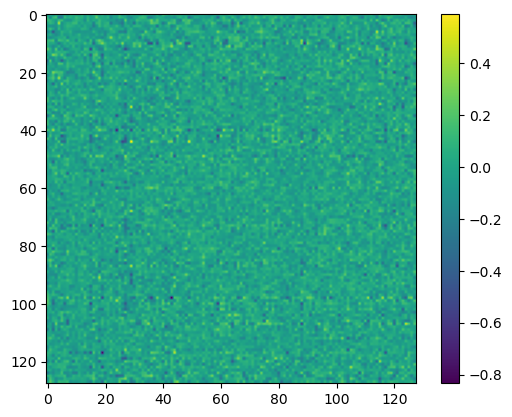

label: linear_relu_stack.8.weight


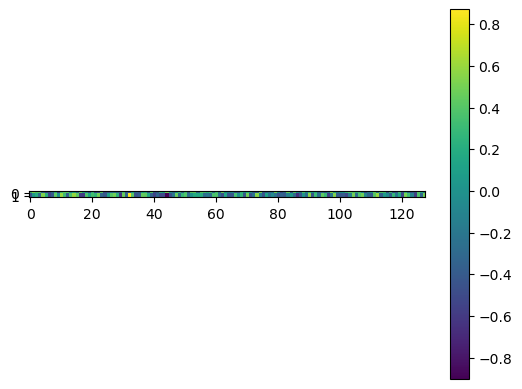

In [679]:
for i in model.state_dict():
    if not( 'bias' in i):
        #print(f"label: {i}, data: {model.state_dict()[i]}")
        print(f"label: {i}")
        plt.imshow(model.state_dict()[i])
        plt.colorbar()
        plt.show()

#model.state_dict()

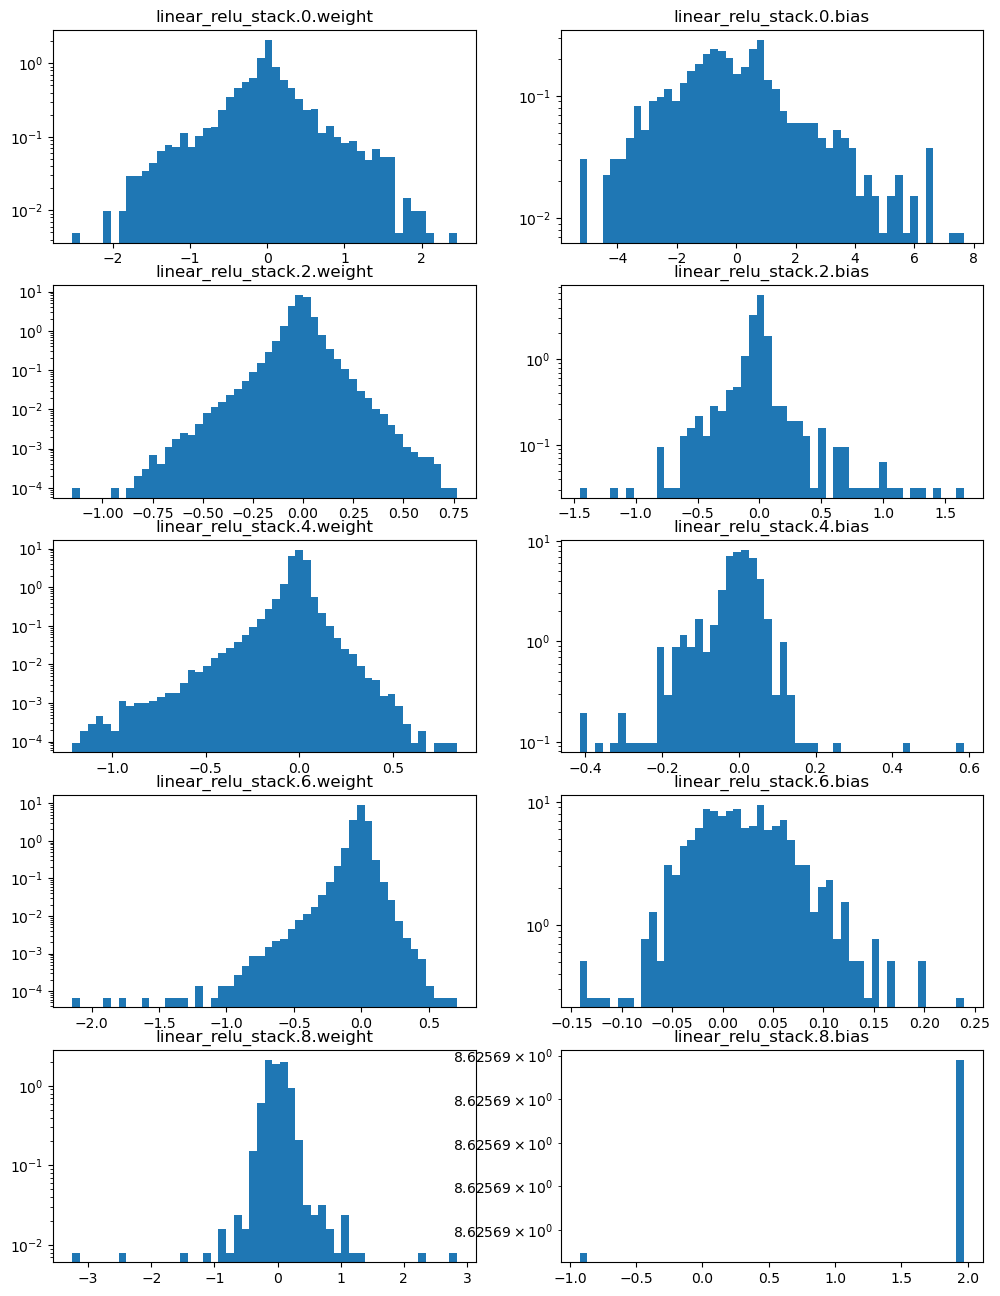

In [1073]:
fig, axs = plt.subplots(int(len(model.state_dict())/2),2, figsize = (12,16))

count = 0
for i in model.state_dict():
    axs[int(count/2),count%2].hist(model.state_dict()[i].reshape(-1),bins=50,align='mid',density=True)
    axs[int(count/2),count%2].set_title(f"{i}")
    axs[int(count/2),count%2].set_yscale('log')
    count += 1
plt.show()

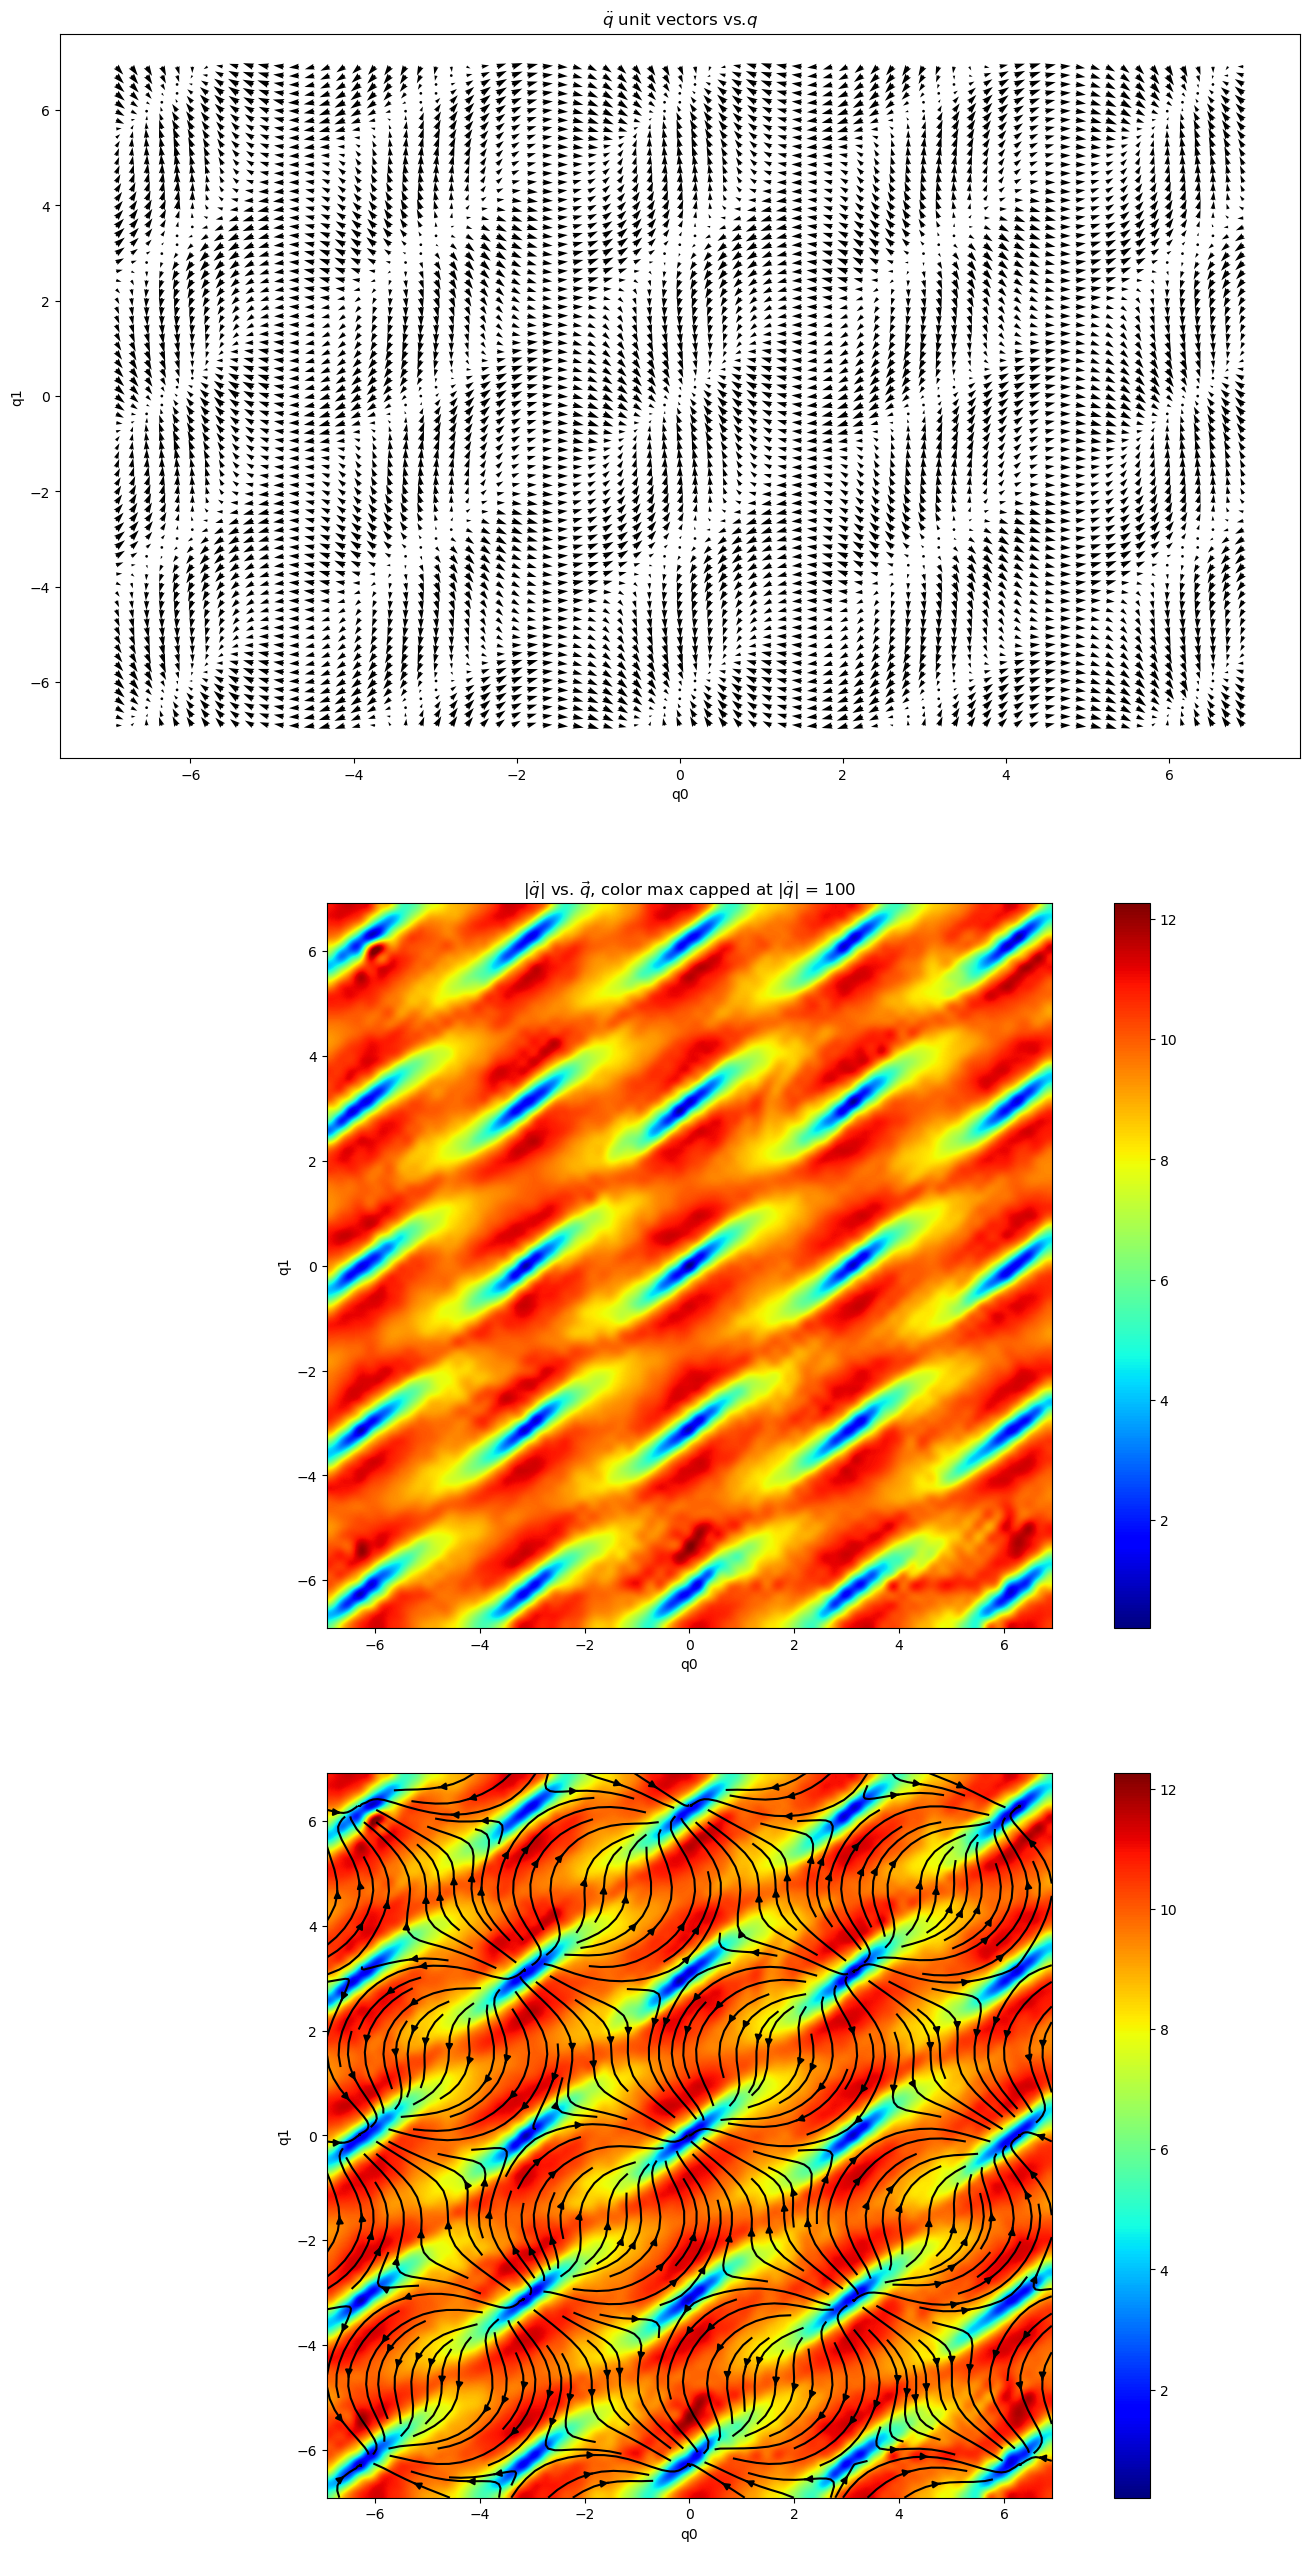

In [1075]:
n_points = 75**2

grid_sampling = 1

t_plot_scale = 2.2
t0_min = -t_plot_scale*pi
t0_max = t_plot_scale*pi
t1_min = -t_plot_scale*pi
t1_max = t_plot_scale*pi

tdot_min = -0
tdot_max = 0


if grid_sampling == 1:
    Qv, QDv = grid_sampling_q_no_qdot(t0_min,t0_max,t1_min,t1_max,n_points)
else:
    Qv, QDv = rand_sampling_q_no_qdot(t0_min,t0_max,t1_min,t1_max,n_points)
n_points = Qv.shape[1]

modelv = vmap(model,in_dims=(1))

Qtot = torch.cat((Qv,QDv))



#out = QDDv(Qv,QDv,m1,m2,l1,l2).mT.cpu().detach()
out_true = QDD_true_v(Qv,QDv,m1,m2,l1,l2).cpu().detach()

model.eval()
out = modelv(Qtot).mT.cpu().detach()
model.train()

out_true = QDD_true_v(Qv,QDv,m1,m2,l1,l2).cpu().detach()

Qv = Qv.cpu().detach()
QDv = QDv.cpu().detach()


outmag = torch.ones(n_points).cpu().detach()#(out[:,0]**2 + out[:,1]**2)**.5
#print(out)

#t_elapsed = time.time() - t1
#print(f"time elapsed = {t_elapsed:.2f}, device = {dev}")


#####
# plotting

quiver_points = 75**2 #define how many arrows to quiver plot
if quiver_points > n_points: #if specified value greater than number of points analyzed
    quiver_points = n_points #set quiver_points to n_points

n_side = min(tensor([int(sqrt(tensor(n_points))), int(sqrt(tensor(quiver_points)))]) )

t0v = Qv[0,:quiver_points].reshape(n_side,n_side).mT.numpy()
t1v = Qv[1,:quiver_points].reshape(n_side,n_side).mT.numpy()

u = out[0,:quiver_points].reshape(n_side,n_side).numpy()
v = out[1,:quiver_points].reshape(n_side,n_side).numpy()

if grid_sampling == 1:
    fig,axs = plt.subplots(3,1,figsize=(16,32))
    
    #scatter = axs[0].scatter(Qv[0,:],Qv[1,:],c=sqrt(sum(out**2,axis=0)),cmap='jet')
    #plt.colorbar(scatter,ax=axs[0])
    axs[0].quiver(Qv[0,:quiver_points],Qv[1,:quiver_points],out[0,:quiver_points]/outmag[:quiver_points],out[1,:quiver_points]/outmag[:quiver_points])
    axs[0].set_xlabel('q0')
    axs[0].set_ylabel('q1')
    axs[0].set_title(r'$\ddot{q}$ unit vectors vs.$q$')

    interp_method = 'lanczos'
    cmax = 100
    colors = axs[1].imshow(np.sqrt(out[0,:]**2 + out[1,:]**2).reshape(int(sqrt(tensor(n_points))),int(sqrt(tensor(n_points)))),extent=[t0v.min(),t0v.max(),t1v.min(),t1v.max()],origin='lower',cmap='jet',interpolation=interp_method)
    plt.colorbar(colors,ax=axs[1])
    axs[1].set_xlabel('q0')
    axs[1].set_ylabel('q1')
    axs[1].set_title(r'$|\ddot{q}|$ vs. $\vec{q}$, color max capped at $|\ddot{q}|$ = ' + f'{cmax}')
    
    
    
    colors = axs[2].imshow(np.sqrt(out[0,:]**2 + out[1,:]**2).reshape(int(sqrt(tensor(n_points))),int(sqrt(tensor(n_points)))),extent=[t0v.min(),t0v.max(),t1v.min(),t1v.max()],cmap='jet',interpolation=interp_method,origin='lower')
    plt.colorbar(colors,ax=axs[2])
    axs[2].streamplot(t0v,t1v,v,u,color='black',density=2)
    axs[2].set_xlabel('q0')
    axs[2].set_ylabel('q1')
    
    plt.show()

else:
    fig,axs = plt.subplots(2,1,figsize=(8,16))
    
    #scatter = axs[0].scatter(Qv[0,:],Qv[1,:],c=sqrt(sum(out**2,axis=0)),cmap='jet')
    #plt.colorbar(scatter,ax=axs[0])
    axs[0].quiver(Qv[0,:quiver_points],Qv[1,:quiver_points],out[0,:quiver_points]/outmag[:quiver_points],out[1,:quiver_points]/outmag[:quiver_points])
    axs[0].set_xlabel('q0')
    axs[0].set_ylabel('q1')
    axs[0].set_title(r'$\ddot{q}$ unit vectors vs.$q$')
    
    cmax = 100
    scatter = axs[1].scatter(Qv[0,:],Qv[1,:],c=sqrt(sum(out**2,axis=0)),cmap='jet')
    plt.colorbar(scatter,ax=axs[1])
    axs[1].set_xlabel('q0')
    axs[1].set_ylabel('q1')
    axs[1].set_title(r'$|\ddot{q}|$ vs. $\vec{q}$, color max capped at $|\ddot{q}|$ = ' + f'{cmax}')



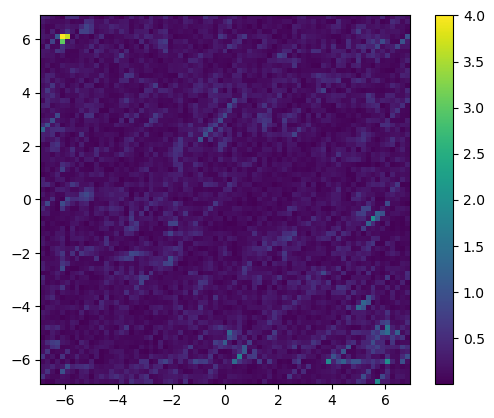

In [1077]:
#plt.imshow( sqrt(sum((out-out_true)**2,axis=0)).reshape(int(sqrt(tensor(n_points))),int(sqrt(tensor(n_points)))),extent=[t0v.min(),t0v.max(),t1v.min(),t1v.max()],origin='lower' )
#out_true = QDD_true_v(Qv,QDv,m1,m2,l1,l2).cpu().detach()

#diff = sqrt( (out[0,:] - out_true[0,:])**2 + (out[1,:] - out_true[1,:])**2)
od0 = out[0,:].reshape(int(sqrt(tensor(n_points))),int(sqrt(tensor(n_points))))
od1 = out[1,:].reshape(int(sqrt(tensor(n_points))),int(sqrt(tensor(n_points))))

otd0 = out_true[0,:].reshape(int(sqrt(tensor(n_points))),int(sqrt(tensor(n_points))))
otd1 = out_true[1,:].reshape(int(sqrt(tensor(n_points))),int(sqrt(tensor(n_points))))

diff = sqrt( (od0-otd0)**2 + (od1-otd1)**2 )
#diff = otd
plt.imshow( (diff),extent=[t0v.min(),t0v.max(),t1v.min(),t1v.max()],origin='lower' )
#plt.imshow( np.log(diff),extent=[t0v.min(),t0v.max(),t1v.min(),t1v.max()],origin='lower' )
#plt.imshow(sqrt(otd0**2+otd1**2),origin='lower')


plt.colorbar()
plt.show()

In [991]:
PATH = '4th_dp_model'
torch.save(model.state_dict(), PATH)
print('Saving complete.')

Saving complete.


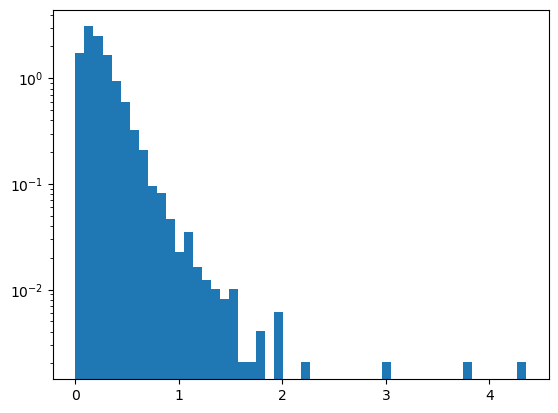

In [1069]:
plt.hist(diff.reshape(-1),density=True,bins=50)
plt.yscale('log')

In [883]:
abs(out_true).max()

tensor(10.3989)